## Oxygen consumption and replacement

Aerobic organisms use respiration for generating ATP. Accordingly there is a direct link between the oxygen that these organisms consume and the ATP that they generate. In an aerobic fermenter oxygen is supplied to the fermenter via the sparging of air. The organisms can be seen as little 'fish' constantly consuming the dissolved oxygen in the liquid. Constant consumption of oxygen will therefore require the constant supply or addition of oxygen. This process is referred to as gas-liquid mass transfer and we will consider the mathematics of this process in order to understand how the organisms are influenced by the rate of oxygen supply (or mass transfer) to the fermenter.

You will note in the calculation of this chapter that oxygen supply becomes an issue when the biomass concentration ($C_X$) in the fermenter is high. More oxygen consuming microbes in the fermenter requires a faster supply of oxygen and at a point will be reached where the supply (or mass transfer) is at a maximum. Once this occurs the microbes have to share the limited oxygen and accordingly their oxygen uptake rates (per biomass) will decrease. The implication is that less ATP will be generated per microbe and this will in turn affect the rate at which these organisms can grow. 

<img src="sparger.jpg" width="350" />


Before we can perform the abovementioned calculation, let's have a look at describing gas-liquid mass transfer. The mathematical formulation of the volumetric (fermenter based) mass transfer rate is given by:

$$r_{O_2}^{mt}=k_La \cdot \left(C_{O_2}^{sat}-C_{O_2} \right)$$
--------
$$ \left[ \frac{mol\,O_2}{L\cdot h}  \right] = \left[ \frac{1}{h} \cdot \frac{mol\,O_2}{L}  \right]$$

Note that $r_{O_2}^{mt}$ is a volume based rate similar to $r_{O_2}^V$. The rate is defined by a mass transfer coefficient ($k_La$) multiplied by a concentration difference between the saturated oxygen concentration ($C_{O_2}^{sat}$) and the oxygen concentration in the fermenter ($C_{O_2}$). The saturated oxygen concentration is dependent on the oxygen partial pressure and typically varies between $6-8 \frac{mg}{L}$ (1.9e-4 to 2.5e-4 $\frac{mol\,O_2}{L}$) at atmospheric air conditions The chemical engineering approach is to assume that all liquid on the gas-liquid interface (edge of bubbles) are saturated (at $C_{O_2}^{sat}$ ) while $C_{O_2}$ will always be less than $C_{O_2}^{sat}$. The mass transfer coefficient (note the units) is determined by the air flowrate, sparger and impeller characteristics but will be supplied in this course.

We will use a pseudo steady state assumption where we assume that the volumetric consumption rate of oxygen by the organisms ($r_{O_2}^V$) is equal to the rate at which oxygen is transferred into the medium ($r_{O_2}^{mt}$). Accordingly there will be no accumulation of oxygen in the liquid. 

$$r_{O_2}^{mt}=r_{O_2}^V=r_{O_2}C_X$$
----

The maximum possible transfer rate of oxygen will be given by:

$$r_{O_2}^{mt_{max}}=k_La \cdot C_{O_2}^{sat}$$
--------

When the maximum transfer rate is achieved the oxygen concentration in the broth $C_{O_2}$ is very low. This will happen when the oxygen supply limits the oxygen uptake by the microbes. A condition will develop where the cell based oxygen consumption $r_{O_2}$ is dictated by the maximum mass transfer via the following relationship:

$$r_{O_2}=\frac{r_{O_2}^{mt_{max}}}{C_X}$$
----

You will note in the example below, that the specifications in the stoichiometric matrix (response function) changes when the limited oxygen condition is achieved. Before the oxygen limitation the oxygen uptake rate ($r_{O_2}$) was calculated based on the $\mu$ specification. Once the limitation kicks in, the $\mu$ specification is replaced by a $r_{O_2}$ specification. The rate of ATP production will now drop since less oxygen is consumed per microbe. How will this affect the growth rate?


### Example

In this example we'll look at aerobic growth on glucose in a batch fermenter We'll start by defining the physiological properties of the microbe:

|$\alpha \qquad \qquad$|$\gamma \qquad \qquad $|$\mu_{max} \qquad$|$\theta_{max}\qquad$| $(P/O)$ $\qquad \qquad$
|----|-|-|-|-
|$\frac{cmol\,CO_2}{cmol \, X}$|$\frac{mol \, ATP}{Cmol \, X}$|$\frac{1}{h}$|$\frac{mol \, ATP}{cmol\,X\cdot h}$|$\frac{mol\,ATP}{mol\, O}$
|0.1|2.5|0.3|0.1|1.5

The biomass formula is given by $CH_{1.8}O_{0.5}N_{0.2}$

The following Monod characteristics are known:

|$K_M\left[\frac{mg}{L} \right] \qquad$ |
 -|-
 **Growth**|30 
**Maintenance**|5 

Since only $CO_2$ will be formed as product, zero product inhibition is present. The following conditions are specified for the batch fermenter:

|V [$L$]|$C_X^o \left[ \frac{g}{L}\right]$|$C_S^o \left[ \frac{g}{L}\right]$
|-------------|-------|------
|2000|0.025 $\qquad$|150 $\qquad$

We can now define the parameters:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook 
from scipy.integrate import solve_ivp
α, γ, μ_max, θ_max, PO = 0.1, 2.5, 0.3, 0.1, 1.5
Km_μ, Km_θ = 30/1000/30, 5/1000/30
Mx = 12+1.8+0.5*16+0.2*14
V, Cxo, Cso = 200, 0.025/Mx, 150/30

We can also define $k_La$ and $C_{O_2}^{sat}$ as 200$\frac{1}{h}$ and 7$\frac{mg}{L}$: 

In [2]:
kla = 200
Co_s_max = 7/1000/32  #mol/l

The flux model is given below. Note that carbon splits between biomass and respiration.

<img src="respv2.png" width="700" />

In [3]:
def response_fun(C):
    
    Cx, Cs = C          
    μ = μ_max * Cs / (Km_μ + Cs)
    θ = θ_max * Cs / (Km_θ + Cs)
    
    ro_mt = kla * Co_s_max
    
    Sbase = np.matrix([[-1,1.1,1,0,0],   #Stoichiometric matrix without specification (4x5)
                         [0,0.1,1,0,-1],
                         [0,0.1,2,-2,0],
                         [0,-2.5,2/3,3,0]])
    
    S1 = np.vstack([Sbase,[0,1,0,0,0]])  #Stoich matrix with growth spec
      
    C = np.matrix([[0, 0, 0, θ, μ]]).T
    r = np.linalg.solve(S1, C)            #rates for regime where no oxygen limitation exist
    
        
    if ro_mt > r[3,0] * Cx:     #no oxygen limitation
        
        return [r[1,0],      #biomass 
               -r[0,0],
                r[4,0],      # CO2 formation
                r[3,0]]      # O2 consumption                                                 
     
    else:
        
        S2 = np.vstack([Sbase, [0, 0, 0, 1, 0]])          #Stoich matrix with oxygen spec

        C2= np.matrix([[0, 0, 0, θ, ro_mt/Cx]]).T   # Note the ro specification!!
        r2 = np.linalg.solve(S2, C2)                 # rates for regime where oxygen limitation exist
        
        
        return [r2[1,0],
               -r2[0,0],
                r2[4,0],    #CO2 formation
                r2[3,0]]    #O2 consumption  

In [4]:
def ferm_eq(t, C):
    Cx, Cs = C[0], C[1]
    r = response_fun([Cx, Cs])     
    
    return [r[0]*Cx,
            r[1]*Cx]    
            

<IPython.core.display.Javascript object>


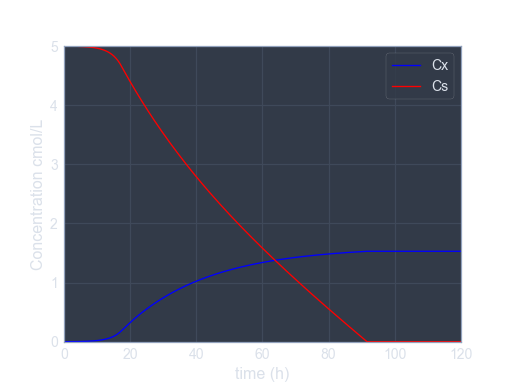

In [5]:
Co = [Cxo, Cso]                     # [Cxo, Cso, Cgo, Ceo] in cmol/L
tmax = 120                                   # Integrate for 20 hours  
tspan = np.linspace(0, tmax, 200)           # define the timespan of the integration
Ci = solve_ivp(ferm_eq, [0, tmax], Co, t_eval = tspan, method = 'Radau').y             # integration via solve_ivp that calls apon ferm_eq

Cx, Cs = Ci

plt.figure(2)
plt.plot(tspan, Cx, color='blue', label='Cx')
plt.plot(tspan, Cs, color='red', label='Cs')
plt.legend(loc='best')
plt.ylabel('Concentration cmol/L') 
plt.xlabel('time (h)') 
plt.xlim(0, tmax)
plt.ylim(0, Cso)
plt.show()

We will further analyse the problem in [Tutorial 10](https://nbviewer.jupyter.org/github/willienicol/Biochemical-engineering-notes/blob/master/Tutorials/Tut%2010.ipynb). Watch the following lecture before starting with the tutorial:

[Video: Lecture 16 Using the response function without integrating](https://youtu.be/SStthNl-0dU)

[Back to Contents page](https://nbviewer.jupyter.org/github/willienicol/Biochemical-engineering-notes/blob/master/List%20of%20contents.ipynb)